In [1]:
# initial imports
import pandas as pd
import requests 
import calendar
import plotly.express as px
import hvplot.pandas
from sqlalchemy import create_engine
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# cfpb:
apor_fixed_url = 'https://s3.amazonaws.com/cfpb-hmda-public/prod/apor/YieldTableFixed.txt'


apor_adj_url = 'https://s3.amazonaws.com/cfpb-hmda-public/prod/apor/YieldTableAdjustable.txt'

In [3]:
apor_fixed_df = pd.read_table(apor_fixed_url, sep='|', index_col='Term of Loan in Years')
apor_fixed_df.head()

1     2     3     4     5     6     7     8     9  \
Term of Loan in Years                                                         
1/2/2017               3.52  3.38  3.47  3.47  3.50  3.50  3.75  3.75  3.90   
1/9/2017               3.52  3.39  3.41  3.41  3.49  3.49  3.77  3.77  3.93   
1/16/2017              3.53  3.40  3.46  3.46  3.43  3.43  3.67  3.67  3.83   
1/23/2017              3.48  3.37  3.36  3.36  3.37  3.37  3.63  3.63  3.78   
1/30/2017              3.32  3.27  3.35  3.35  3.36  3.36  3.64  3.64  3.81   

                         10  ...    41    42    43    44    45    46    47  \
Term of Loan in Years        ...                                             
1/2/2017               3.90  ...  4.36  4.36  4.36  4.36  4.36  4.36  4.36   
1/9/2017               3.93  ...  4.24  4.24  4.24  4.24  4.24  4.24  4.24   
1/16/2017              3.83  ...  4.16  4.16  4.16  4.16  4.16  4.16  4.16   
1/23/2017              3.78  ...  4.13  4.13  4.13  4.13  4.13  4.13  4.13   
1/30/2017              3.81  ...  4.22  4.22  4.22  4.22  4.22  4.22  4.22   

                         48    49    50  
Term of Loan in Years                    
1/2/2017               4.36  4.36  4.36  
1/9/2017               4.24  4.24  4.24  
1/16/2017              4.16  4.16  4.16  
1/23/2017              4.13  4.13  4.13  
1/30/2017              4.22  4.22  4.22  

[5 rows x 50 columns]

In [4]:
apor_adj_df = pd.read_csv(apor_adj_url, sep='|', index_col='Years to First Adjustment')
apor_adj_df.head()

1     2     3     4     5     6     7     8  \
Years to First Adjustment                                                   
1/2/2017                   3.60  3.56  3.57  3.57  3.56  3.56  3.66  3.66   
1/9/2017                   3.59  3.56  3.55  3.55  3.55  3.55  3.67  3.67   
1/16/2017                  3.52  3.50  3.50  3.50  3.48  3.48  3.58  3.58   
1/23/2017                  3.52  3.50  3.48  3.48  3.46  3.46  3.56  3.56   
1/30/2017                  3.49  3.48  3.47  3.47  3.46  3.46  3.57  3.57   

                              9    10  ...    41    42    43    44    45  \
Years to First Adjustment              ...                                 
1/2/2017                   3.77  3.77  ...  3.77  3.77  3.77  3.77  3.77   
1/9/2017                   3.79  3.79  ...  3.79  3.79  3.79  3.79  3.79   
1/16/2017                  3.70  3.70  ...  3.70  3.70  3.70  3.70  3.70   
1/23/2017                  3.67  3.67  ...  3.67  3.67  3.67  3.67  3.67   
1/30/2017                  3.69  3.69  ...  3.69  3.69  3.69  3.69  3.69   

                             46    47    48    49    50  
Years to First Adjustment                                
1/2/2017                   3.77  3.77  3.77  3.77  3.77  
1/9/2017                   3.79  3.79  3.79  3.79  3.79  
1/16/2017                  3.70  3.70  3.70  3.70  3.70  
1/23/2017                  3.67  3.67  3.67  3.67  3.67  
1/30/2017                  3.69  3.69  3.69  3.69  3.69  

[5 rows x 50 columns]

In [5]:
apor_fixed_df = apor_fixed_df.drop(['1','2','3','4','5','6','7','8','9','11','12','13','14','15','16','17','18','19','21','22','23','24','25','26','27','28','29','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50'], axis=1)
apor_fixed_df

10    20    30
Term of Loan in Years                  
1/2/2017               3.90  3.62  4.36
1/9/2017               3.93  3.51  4.24
1/16/2017              3.83  3.44  4.16
1/23/2017              3.78  3.41  4.13
1/30/2017              3.81  3.46  4.22
...                     ...   ...   ...
6/1/2020               3.55  2.72  3.21
6/8/2020               3.54  2.72  3.24
6/15/2020              3.61  2.73  3.28
6/22/2020              3.56  2.69  3.19
6/29/2020              3.57  2.70  3.19

[183 rows x 3 columns]

In [6]:
apor_adj_df = apor_adj_df.drop(['1','2','4','5','7','8','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50'], axis=1)
apor_adj_df

3     6     9
Years to First Adjustment                  
1/2/2017                   3.57  3.56  3.77
1/9/2017                   3.55  3.55  3.79
1/16/2017                  3.50  3.48  3.70
1/23/2017                  3.48  3.46  3.67
1/30/2017                  3.47  3.46  3.69
...                         ...   ...   ...
6/1/2020                   2.97  3.03  3.29
6/8/2020                   2.96  3.01  3.28
6/15/2020                  2.97  3.03  3.33
6/22/2020                  2.97  3.02  3.30
6/29/2020                  2.96  3.01  3.29

[183 rows x 3 columns]

In [7]:
csvpath_fix = Path('./Resources/YieldTableFixed.csv')
apor_fixed_df_00_16 = pd.read_csv(csvpath_fix, index_col='Term of Loan in Years')
apor_fixed_df_00_16

1     2     3     4     5     6     7     8     9  \
Term of Loan in Years                                                         
1/3/2000               8.64  7.92  7.62  7.62  7.40  7.40  7.47  7.47  7.27   
1/10/2000              8.49  7.89  7.63  7.63  7.44  7.44  7.49  7.49  7.34   
1/17/2000              8.69  8.02  7.72  7.72  7.52  7.52  7.53  7.53  7.39   
1/24/2000              8.83  8.08  7.76  7.76  7.53  7.53  7.53  7.53  7.41   
1/31/2000              8.54  7.94  7.69  7.69  7.53  7.53  7.54  7.54  7.43   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
11/28/2016             3.23  3.12  3.23  3.23  3.28  3.28  3.58  3.58  3.73   
12/5/2016              3.19  3.11  3.24  3.24  3.31  3.31  3.61  3.61  3.76   
12/12/2016             3.22  3.22  3.26  3.26  3.37  3.37  3.66  3.66  3.82   
12/19/2016             3.25  3.16  3.28  3.28  3.35  3.35  3.65  3.65  3.83   
12/26/2016             3.37  3.28  3.41  3.41  3.48  3.48  3.76  3.76  3.92   

                         10  ...    41    42    43    44    45    46    47  \
Term of Loan in Years        ...                                             
1/3/2000               7.27  ...  8.17  8.17  8.17  8.17  8.17  8.17  8.17   
1/10/2000              7.34  ...  8.26  8.26  8.26  8.26  8.26  8.26  8.26   
1/17/2000              7.39  ...  8.29  8.29  8.29  8.29  8.29  8.29  8.29   
1/24/2000              7.41  ...  8.37  8.37  8.37  8.37  8.37  8.37  8.37   
1/31/2000              7.43  ...  8.36  8.36  8.36  8.36  8.36  8.36  8.36   
...                     ...  ...   ...   ...   ...   ...   ...   ...   ...   
11/28/2016             3.73  ...  4.07  4.07  4.07  4.07  4.07  4.07  4.07   
12/5/2016              3.76  ...  4.12  4.12  4.12  4.12  4.12  4.12  4.12   
12/12/2016             3.82  ...  4.17  4.17  4.17  4.17  4.17  4.17  4.17   
12/19/2016             3.83  ...  4.20  4.20  4.20  4.20  4.20  4.20  4.20   
12/26/2016             3.92  ...  4.34  4.34  4.34  4.34  4.34  4.34  4.34   

                         48    49    50  
Term of Loan in Years                    
1/3/2000               8.17  8.17  8.17  
1/10/2000              8.26  8.26  8.26  
1/17/2000              8.29  8.29  8.29  
1/24/2000              8.37  8.37  8.37  
1/31/2000              8.36  8.36  8.36  
...                     ...   ...   ...  
11/28/2016             4.07  4.07  4.07  
12/5/2016              4.12  4.12  4.12  
12/12/2016             4.17  4.17  4.17  
12/19/2016             4.20  4.20  4.20  
12/26/2016             4.34  4.34  4.34  

[887 rows x 50 columns]

In [8]:
csvpath_adj = Path('./Resources/YieldTableAdjustable.csv')
apor_adj_df_00_16 = pd.read_csv(csvpath_adj, index_col='Years to First Adjustment')
apor_adj_df_00_16

1     2     3     4     5     6     7     8  \
Years to First Adjustment                                                   
1/3/2000                   8.61  8.47  8.33  8.33  8.09  8.09  7.98  7.98   
1/10/2000                  8.69  8.56  8.41  8.41  8.17  8.17  8.04  8.04   
1/17/2000                  8.75  8.63  8.47  8.47  8.23  8.23  8.08  8.08   
1/24/2000                  8.77  8.65  8.49  8.49  8.24  8.24  8.09  8.09   
1/31/2000                  8.77  8.64  8.49  8.49  8.25  8.25  8.10  8.10   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
11/28/2016                 3.48  3.44  3.44  3.44  3.42  3.42  3.53  3.53   
12/5/2016                  3.47  3.44  3.43  3.43  3.43  3.43  3.54  3.54   
12/12/2016                 3.50  3.48  3.47  3.47  3.47  3.47  3.58  3.58   
12/19/2016                 3.55  3.52  3.51  3.51  3.50  3.50  3.61  3.61   
12/26/2016                 3.58  3.55  3.56  3.56  3.55  3.55  3.67  3.67   

                              9    10  ...    41    42    43    44    45  \
Years to First Adjustment              ...                                 
1/3/2000                   7.68  7.68  ...  7.68  7.68  7.68  7.68  7.68   
1/10/2000                  7.76  7.76  ...  7.76  7.76  7.76  7.76  7.76   
1/17/2000                  7.81  7.81  ...  7.81  7.81  7.81  7.81  7.81   
1/24/2000                  7.83  7.83  ...  7.83  7.83  7.83  7.83  7.83   
1/31/2000                  7.85  7.85  ...  7.85  7.85  7.85  7.85  7.85   
...                         ...   ...  ...   ...   ...   ...   ...   ...   
11/28/2016                 3.64  3.64  ...  3.64  3.64  3.64  3.64  3.64   
12/5/2016                  3.65  3.65  ...  3.65  3.65  3.65  3.65  3.65   
12/12/2016                 3.70  3.70  ...  3.70  3.70  3.70  3.70  3.70   
12/19/2016                 3.73  3.73  ...  3.73  3.73  3.73  3.73  3.73   
12/26/2016                 3.79  3.79  ...  3.79  3.79  3.79  3.79  3.79   

                             46    47    48    49    50  
Years to First Adjustment                                
1/3/2000                   7.68  7.68  7.68  7.68  7.68  
1/10/2000                  7.76  7.76  7.76  7.76  7.76  
1/17/2000                  7.81  7.81  7.81  7.81  7.81  
1/24/2000                  7.83  7.83  7.83  7.83  7.83  
1/31/2000                  7.85  7.85  7.85  7.85  7.85  
...                         ...   ...   ...   ...   ...  
11/28/2016                 3.64  3.64  3.64  3.64  3.64  
12/5/2016                  3.65  3.65  3.65  3.65  3.65  
12/12/2016                 3.70  3.70  3.70  3.70  3.70  
12/19/2016                 3.73  3.73  3.73  3.73  3.73  
12/26/2016                 3.79  3.79  3.79  3.79  3.79  

[887 rows x 50 columns]

In [9]:
apor_fixed_df_00_16 = apor_fixed_df_00_16.drop(['1','2','3','4','5','6','7','8','9','11','12','13','14','15','16','17','18','19','21','22','23','24','25','26','27','28','29','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50'], axis=1)
apor_fixed_df_00_16

10    20    30
Term of Loan in Years                  
1/3/2000               7.27  7.83  8.17
1/10/2000              7.34  7.90  8.26
1/17/2000              7.39  7.95  8.29
1/24/2000              7.41  8.03  8.37
1/31/2000              7.43  8.01  8.36
...                     ...   ...   ...
11/28/2016             3.73  3.32  4.07
12/5/2016              3.76  3.41  4.12
12/12/2016             3.82  3.43  4.17
12/19/2016             3.83  3.44  4.20
12/26/2016             3.92  3.59  4.34

[887 rows x 3 columns]

In [10]:
apor_adj_df_00_16 = apor_adj_df_00_16.drop(['1','2','4','5','7','8','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50'], axis=1)
apor_adj_df_00_16

3     6     9
Years to First Adjustment                  
1/3/2000                   8.33  8.09  7.68
1/10/2000                  8.41  8.17  7.76
1/17/2000                  8.47  8.23  7.81
1/24/2000                  8.49  8.24  7.83
1/31/2000                  8.49  8.25  7.85
...                         ...   ...   ...
11/28/2016                 3.44  3.42  3.64
12/5/2016                  3.43  3.43  3.65
12/12/2016                 3.47  3.47  3.70
12/19/2016                 3.51  3.50  3.73
12/26/2016                 3.56  3.55  3.79

[887 rows x 3 columns]

In [11]:
apor_fix_combined = pd.concat([apor_fixed_df_00_16, apor_fixed_df], axis=0)
apor_fix_combined

10    20    30
Term of Loan in Years                  
1/3/2000               7.27  7.83  8.17
1/10/2000              7.34  7.90  8.26
1/17/2000              7.39  7.95  8.29
1/24/2000              7.41  8.03  8.37
1/31/2000              7.43  8.01  8.36
...                     ...   ...   ...
6/1/2020               3.55  2.72  3.21
6/8/2020               3.54  2.72  3.24
6/15/2020              3.61  2.73  3.28
6/22/2020              3.56  2.69  3.19
6/29/2020              3.57  2.70  3.19

[1070 rows x 3 columns]

In [12]:
apor_adj_combined = pd.concat([apor_adj_df_00_16, apor_adj_df], axis=0)
apor_adj_combined

3     6     9
Years to First Adjustment                  
1/3/2000                   8.33  8.09  7.68
1/10/2000                  8.41  8.17  7.76
1/17/2000                  8.47  8.23  7.81
1/24/2000                  8.49  8.24  7.83
1/31/2000                  8.49  8.25  7.85
...                         ...   ...   ...
6/1/2020                   2.97  3.03  3.29
6/8/2020                   2.96  3.01  3.28
6/15/2020                  2.97  3.03  3.33
6/22/2020                  2.97  3.02  3.30
6/29/2020                  2.96  3.01  3.29

[1070 rows x 3 columns]

In [13]:
percent_change_fix = apor_fix_combined.pct_change()
percent_change_fix = percent_change_fix.dropna()
percent_change_fix

10        20        30
Term of Loan in Years                              
1/10/2000              0.009629  0.008940  0.011016
1/17/2000              0.006812  0.006329  0.003632
1/24/2000              0.002706  0.010063  0.009650
1/31/2000              0.002699 -0.002491 -0.001195
2/7/2000              -0.024226  0.001248  0.000000
...                         ...       ...       ...
6/1/2020              -0.011142 -0.028571 -0.027273
6/8/2020              -0.002817  0.000000  0.009346
6/15/2020              0.019774  0.003676  0.012346
6/22/2020             -0.013850 -0.014652 -0.027439
6/29/2020              0.002809  0.003717  0.000000

[1069 rows x 3 columns]

In [14]:
percent_change_adj = apor_adj_combined.pct_change()
percent_change_adj = percent_change_adj.dropna()
percent_change_adj

3         6         9
Years to First Adjustment                              
1/10/2000                  0.009604  0.009889  0.010417
1/17/2000                  0.007134  0.007344  0.006443
1/24/2000                  0.002361  0.001215  0.002561
1/31/2000                  0.000000  0.001214  0.002554
2/7/2000                   0.011779  0.008485 -0.011465
...                             ...       ...       ...
6/1/2020                   0.003378  0.000000 -0.006042
6/8/2020                  -0.003367 -0.006601 -0.003040
6/15/2020                  0.003378  0.006645  0.015244
6/22/2020                  0.000000 -0.003300 -0.009009
6/29/2020                 -0.003367 -0.003311 -0.003030

[1069 rows x 3 columns]

In [15]:
percent_change_fix.hvplot.line(ylabel = "pct change in APOR", rot=90, figsize=(30,10))
#how to clean up x axis

:NdOverlay   [Variable]
   :Curve   [Term of Loan in Years]   (value)

In [16]:
percent_change_adj.hvplot.line(ylabel = "pct change in APOR", rot=90, figsize=(30,10))

:NdOverlay   [Variable]
   :Curve   [Years to First Adjustment]   (value)

In [17]:
percent_change_fix.hvplot.line(ylabel = "pct change in APOR", rot=90, figsize=(30,10)) * percent_change_adj.hvplot.line(ylabel = "pct change in APOR", rot=90, figsize=(30,10))

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Term of Loan in Years]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [Years to First Adjustment]   (value)

In [18]:
volatility_fix = percent_change_fix.std()*(252**0.5)
print(volatility_fix)

10    0.265006
20    0.302456
30    0.279758
dtype: float64


In [19]:
volatility_adj = percent_change_adj.std()*(252**0.5)
print(volatility_adj)

3    0.245020
6    0.235926
9    0.219972
dtype: float64


In [20]:
current_apor_fix_10 = apor_fixed_df['10'][-1]
current_apor_fix_20 = apor_fixed_df['20'][-1]
current_apor_fix_30 = apor_fixed_df['30'][-1]
current_apor_fix_30

3.19

In [21]:
current_apor_adj_3 = apor_adj_df['3'][-1]
current_apor_adj_6 = apor_adj_df['6'][-1]
current_apor_adj_9 = apor_adj_df['9'][-1]
current_apor_adj_3

2.96

In [22]:
mean_fix = percent_change_fix.mean()
print(mean_fix)

10   -0.000526
20   -0.000816
30   -0.000726
dtype: float64


In [23]:
mean_fix_30 = mean_fix['30']
print(mean_fix_30)

-0.0007257771287659756


In [24]:
mean_adj = percent_change_adj.mean()
print(mean_adj)

3   -0.000847
6   -0.000813
9   -0.000697
dtype: float64


In [25]:
mean_adj_3 = mean_adj['3']
print(mean_adj_3)

-0.0008470577053178393


In [26]:
std_dev_fix = percent_change_fix.std()
print(std_dev_fix)

10    0.016694
20    0.019053
30    0.017623
dtype: float64


In [27]:
std_dev_fix_30 = std_dev_fix['30']
print(std_dev_fix_30)

0.0176230677934244


In [28]:
std_dev_adj = percent_change_adj.std()
print(std_dev_adj)

3    0.015435
6    0.014862
9    0.013857
dtype: float64


In [29]:
std_dev_adj_3 = std_dev_adj['3']
print(std_dev_adj_3)

0.015434794036530667


In [30]:
number_simulations = 200
number_records = 52 * 3

In [31]:
# Run the Monte Carlo Simulation
simulated_apor_fix_df = pd.DataFrame()
simulated_apor_adj_df = pd.DataFrame()
count = 0

for n in range(number_simulations):
    simulated_apor_fixed = [current_apor_fix_30]
    simulated_apor_adjustable = [current_apor_adj_3]
    for i in range(number_records):
        simulated_apor_fix = simulated_apor_fixed[-1] * (1 + np.random.normal(mean_fix_30, std_dev_fix_30))
        simulated_apor_adj = simulated_apor_adjustable[-1] * (1 + np.random.normal(mean_adj_3, std_dev_adj_3))
        
        simulated_apor_fixed.append(simulated_apor_fix)
        simulated_apor_adjustable.append(simulated_apor_adj)
    count += 1

    simulated_apor_fix_df[count] = pd.Series(simulated_apor_fixed)
    simulated_apor_adj_df[count] = pd.Series(simulated_apor_adjustable)
    


In [32]:
simulated_apor_fix_df

1         2         3         4         5         6         7    \
0    3.190000  3.190000  3.190000  3.190000  3.190000  3.190000  3.190000   
1    3.238354  3.234046  3.193204  3.203049  3.217191  3.098909  3.235296   
2    3.302873  3.223817  3.201779  3.306165  3.233408  3.069466  3.312051   
3    3.316465  3.139469  3.207951  3.342418  3.157305  3.133749  3.312716   
4    3.344893  3.156987  3.301626  3.358483  3.231345  3.057841  3.250653   
..        ...       ...       ...       ...       ...       ...       ...   
152  2.778606  2.528151  2.985580  2.762881  2.499883  2.230521  2.224060   
153  2.810775  2.466281  2.912913  2.745920  2.496278  2.197181  2.231992   
154  2.862718  2.407465  3.015662  2.772892  2.498408  2.168892  2.234630   
155  2.825659  2.370923  3.072210  2.721906  2.521051  2.125659  2.213872   
156  2.810737  2.417079  3.067361  2.735304  2.563727  2.108168  2.215953   

          8         9         10   ...       191       192       193  \
0    3.190000  3.190000  3.190000  ...  3.190000  3.190000  3.190000   
1    3.270267  3.213527  3.126007  ...  3.125908  3.247300  3.092556   
2    3.206888  3.197377  3.161188  ...  3.072771  3.285682  3.055034   
3    3.298611  3.099029  3.152114  ...  3.070129  3.309150  3.035916   
4    3.285150  3.008086  3.243259  ...  3.078393  3.310679  3.053152   
..        ...       ...       ...  ...       ...       ...       ...   
152  2.933309  2.366715  2.939163  ...  2.479409  2.334492  2.481660   
153  2.785105  2.388522  2.846464  ...  2.499158  2.412504  2.465705   
154  2.729272  2.402926  2.852142  ...  2.529591  2.423820  2.445196   
155  2.773795  2.371184  2.837361  ...  2.451045  2.404448  2.476144   
156  2.746353  2.314726  2.830139  ...  2.463235  2.333126  2.573215   

          194       195       196       197       198       199       200  
0    3.190000  3.190000  3.190000  3.190000  3.190000  3.190000  3.190000  
1    3.184103  3.112538  3.177667  3.124686  3.254748  3.207397  3.162470  
2    3.164745  3.108363  3.137984  3.059708  3.290978  3.262940  3.220729  
3    3.181025  3.011875  3.182864  3.066156  3.260596  3.218883  3.199398  
4    3.113796  3.085226  3.171525  3.159034  3.264954  3.179509  3.274537  
..        ...       ...       ...       ...       ...       ...       ...  
152  1.675136  3.362639  2.454218  3.410015  3.019780  2.820438  3.403566  
153  1.641448  3.460342  2.499665  3.485834  3.008824  2.828120  3.367190  
154  1.683569  3.509096  2.524875  3.475942  3.074963  2.827870  3.431251  
155  1.689331  3.527029  2.515793  3.612689  3.046273  2.792678  3.387761  
156  1.701692  3.436677  2.499431  3.586100  3.087920  2.785695  3.382975  

[157 rows x 200 columns]

In [33]:
simulated_apor_fix_df.hvplot(title='Simulated Fixed APOR for 30 year', figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [34]:
last_apor_yr30 = simulated_apor_fix_df.iloc[-1,:]
print(last_apor_yr30)

1      2.810737
2      2.417079
3      3.067361
4      2.735304
5      2.563727
         ...   
196    2.499431
197    3.586100
198    3.087920
199    2.785695
200    3.382975
Name: 156, Length: 200, dtype: float64


In [35]:
simulated_apor_adj_df

1         2         3         4         5         6         7    \
0    2.960000  2.960000  2.960000  2.960000  2.960000  2.960000  2.960000   
1    3.000322  2.964575  2.976660  3.033958  2.931226  3.000353  2.963911   
2    2.940095  2.947112  2.950047  3.088884  2.957718  2.934412  2.902440   
3    2.922530  2.914027  2.846566  3.103481  2.977272  2.926008  2.956518   
4    2.840032  2.917661  2.873164  3.062479  2.960506  2.914758  2.962146   
..        ...       ...       ...       ...       ...       ...       ...   
152  2.356881  2.109772  2.127635  2.829275  3.199336  3.045682  2.213188   
153  2.289865  2.085733  2.143893  2.797909  3.162035  2.995354  2.210834   
154  2.284351  2.108923  2.065357  2.770610  3.096594  2.964487  2.177448   
155  2.232674  2.154507  2.161879  2.775560  3.027264  2.964138  2.143328   
156  2.221776  2.185791  2.210149  2.739093  3.042733  2.943851  2.147305   

          8         9         10   ...       191       192       193  \
0    2.960000  2.960000  2.960000  ...  2.960000  2.960000  2.960000   
1    2.981623  2.878854  2.934935  ...  2.963751  2.985170  2.944606   
2    3.025023  2.904806  2.948460  ...  2.999182  3.026043  2.992531   
3    3.036076  2.833205  2.895215  ...  3.015116  3.030948  3.021937   
4    3.029267  2.796795  2.856222  ...  3.020043  3.035794  2.967544   
..        ...       ...       ...  ...       ...       ...       ...   
152  2.264319  1.695877  2.281807  ...  2.892724  2.770408  3.497793   
153  2.276540  1.694470  2.264207  ...  2.942889  2.720384  3.496190   
154  2.280654  1.656983  2.250375  ...  3.023733  2.684789  3.390992   
155  2.316702  1.604893  2.277046  ...  2.934789  2.677420  3.403319   
156  2.292167  1.586535  2.281080  ...  2.937530  2.642862  3.403686   

          194       195       196       197       198       199       200  
0    2.960000  2.960000  2.960000  2.960000  2.960000  2.960000  2.960000  
1    2.946999  2.972603  3.047068  2.978444  3.014580  3.021189  3.015066  
2    2.981076  2.828373  3.030886  2.994351  2.998082  3.007918  3.054486  
3    2.956628  2.880522  2.981929  3.037957  3.044793  3.073351  3.041565  
4    2.994711  2.953275  2.981324  3.018281  3.091308  3.122221  3.017770  
..        ...       ...       ...       ...       ...       ...       ...  
152  1.701042  3.175127  3.552687  2.274973  2.515286  2.929609  2.178296  
153  1.650666  3.117286  3.578040  2.291936  2.387572  2.871904  2.189486  
154  1.620069  3.103982  3.601413  2.329334  2.444959  2.853510  2.192470  
155  1.615324  3.105474  3.692390  2.310120  2.492681  2.854517  2.184292  
156  1.621445  3.047432  3.756804  2.322738  2.497914  2.869632  2.162048  

[157 rows x 200 columns]

In [36]:
simulated_apor_adj_df.hvplot(title='Simulated APOR for 3yr ARM', figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [37]:
last_apor_yr3 = simulated_apor_adj_df.iloc[-1,:]
print(last_apor_yr3)

1      2.221776
2      2.185791
3      2.210149
4      2.739093
5      3.042733
         ...   
196    3.756804
197    2.322738
198    2.497914
199    2.869632
200    2.162048
Name: 156, Length: 200, dtype: float64


In [38]:
confidence_interval_fix = last_apor_yr30.quantile(q=[0.05, 0.95])
confidence_interval_fix

0.05    1.848734
0.95    3.788721
Name: 156, dtype: float64

In [39]:
confidence_interval_adj = last_apor_yr3.quantile(q=[0.05, 0.95])
confidence_interval_adj

0.05    1.825580
0.95    3.404837
Name: 156, dtype: float64

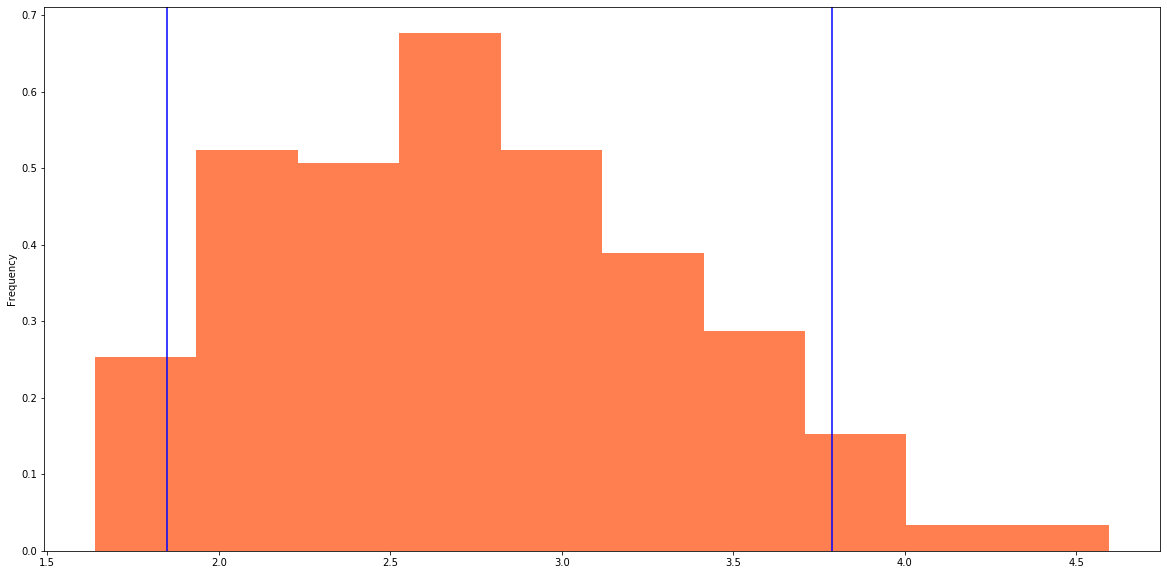

In [40]:
plt.figure(figsize=(20,10));
last_apor_yr30.plot(kind='hist', color='coral', density=True)
plt.axvline(confidence_interval_fix.iloc[0], color='b')
plt.axvline(confidence_interval_fix.iloc[1], color='b')

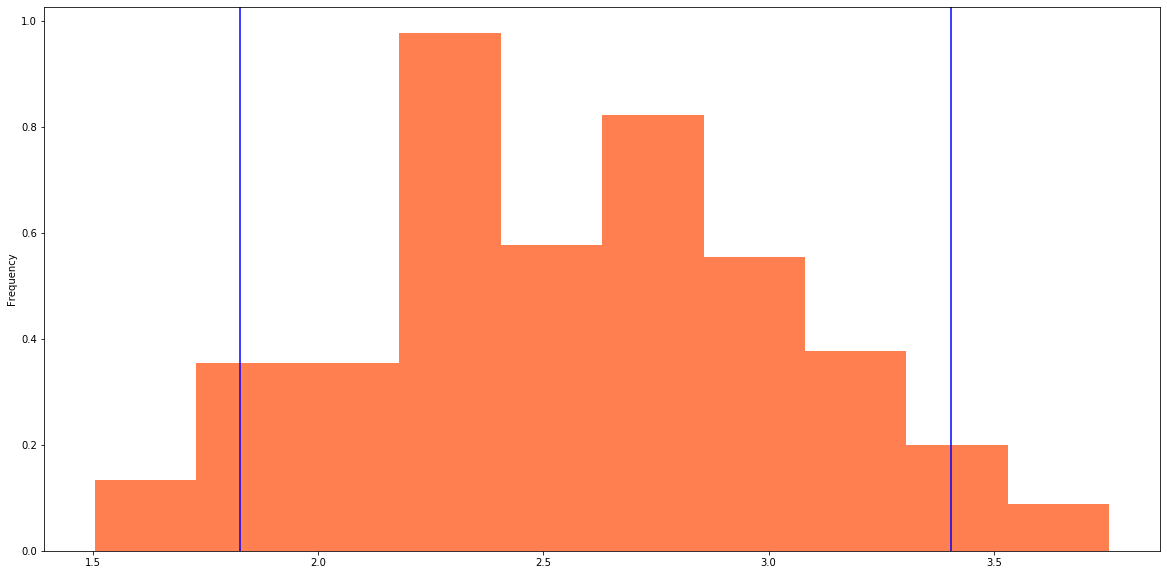

In [41]:
plt.figure(figsize=(20,10));
last_apor_yr3.plot(kind='hist', color='coral', density=True)
plt.axvline(confidence_interval_adj.iloc[0], color='b')
plt.axvline(confidence_interval_adj.iloc[1], color='b')

In [48]:
mean_fix_est = last_apor_yr30.mean()
print(mean_fix_est)

2.7479011091088075


In [50]:
mean_adj_est = last_apor_yr3.mean()
print(mean_adj_est)

2.565319177056454


In [51]:
diff_current_sim_fix = mean_fix_est - current_apor_fix_30
diff_current_sim_fix

-0.4420988908911925

In [52]:
diff_current_sim_adj = mean_adj_est - current_apor_adj_3
diff_current_sim_adj

-0.3946808229435459